In [8]:
# activate numpy and matplotlib functions
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [9]:
# Dynamically reload modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
# Figure width
fig_width=8

In [11]:
#Import IFU database interface package (pycomlink is imported there)
import ifu_comlink_database as icd

# Load data of one MW-link as Comlink Object

In [12]:
cml_id = 'MY0364_2_MY2291_3'
cml = icd.db_interface.expt.get_cml_data_from_IFU_database(cml_id, '2014-11-16', '2014-12-31')

## Print CML info

In [13]:
cml.info()

ID: MY0364_2_MY2291_3
-------------------------------------------------------------
     Site A                       Site B
 IP: 10.30.69.26                 10.30.69.20
  f:   --------- 19.15 GHz ---------- 
  f:   --------- 18.14 GHz ---------- 
  L: 10.926 km


## Do processing

In [14]:
cml.do_wet_dry_classification(method='std_dev', 
                              window_length=100, 
                              threshold=0.7)
cml.do_baseline_determination(method='linear')
cml.calc_A()
cml.calc_R_from_A()

## Plot everything

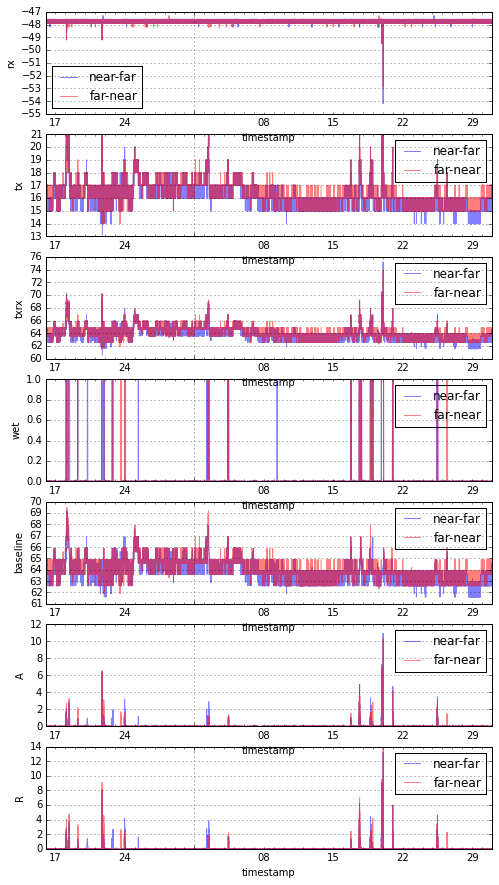

In [15]:
cml.plot(param_list=['rx', 'tx', 'txrx', 'wet', 'baseline', 'A', 'R'], 
         figsize=(fig_width,15), 
         resampling_time='min', 
         alpha=0.5);

## Plot rainfall depth

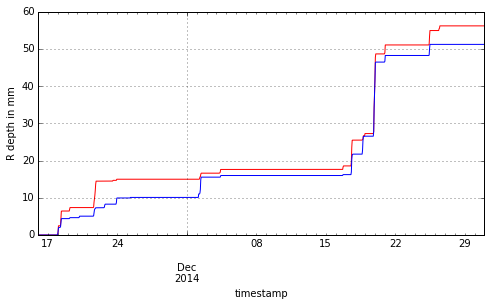

In [16]:
cml.data.R_fn.resample('H').cumsum().plot(color='r');
cml.data.R_nf.resample('H').cumsum().plot(color='b', figsize=(fig_width,4))

ylabel('R depth in mm');

# Load data of several MW-link from area as ComlinkSet

In [17]:
# Define coordinates of area corner points [lower_lon,upper_lon,lower_lat,upper_lat]
area=[10.75,12,47.75,48.25]

# Get list of MW-link IDs
cml_list=icd.db_interface.expt.get_link_list_from_area(area)

# Get ComlinkSet
cmls=icd.db_interface.expt.get_cml_set_data(cml_list,'2014-12-19 15:00','2014-12-21 12:00', t_str_format='%Y-%m-%d %H:%M')

## Print CMLS info

In [18]:
cmls.info()

Number of Comlink Objects in ComlinkSet: 29
IDs: 
     MY0338_2_MY2032_3
     MY2444_2_MY3184_2
     MY2446_2_MY2032_2
     MY4200_2_MY3184_3
     MY1338_2_MY2592_3
     MY0364_2_MY2291_3
     MY2031_2_MY2068_2
     MY1425_2_MY2303_2
     MY3512_2_MY2067_2
     MY3942_2_MY2033_4
     MY2231_2_MY0338_3
     MY4477_2_MY3184_4
     MY4477_3_MY3184_4
     MY0853_2_MY2033_2
     MY0853_3_MY2033_2
     MY0872_2_MY2251_3
     MY0872_3_MY2251_3
     MY2291_2_MY1426_2
     MY1071_2_MY2068_2
     MY0165_2_MY4200_3
     MY0165_3_MY4200_3
     MY2301_2_MY3044_2
     MY0869_2_MY2248_4
     MY0518_2_MY2033_2
     MY4444_2_MY2557_2
     MY2018_2_MY2033_4
     MY0607_2_MY2068_3
     MY0803_2_MY2291_4
     MY0803_3_MY2291_4


## Print CML info of arbitrary Comlink Object

In [19]:
cmls.set[25].info()

ID: MY2018_2_MY2033_4
-------------------------------------------------------------
     Site A                       Site B
 IP: 10.30.64.12                 10.30.64.4
  f:   --------- 18.195 GHz ---------- 
  f:   --------- 19.205 GHz ---------- 
  L: 11.878 km


## Do processing

In [22]:
cmls.do_wet_dry_classification(method='std_dev', 
                              window_length=100, 
                              threshold=0.7)
cmls.do_baseline_determination(method='linear')
cmls.calc_A()
cmls.calc_R_from_A()

/home/chwala-c/code/pycomlink/pycomlink/comlinkset.py:226: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if a==None or b==None:


## Plot accumulated precipitation (Inverse Distance Weighting Interpolation)

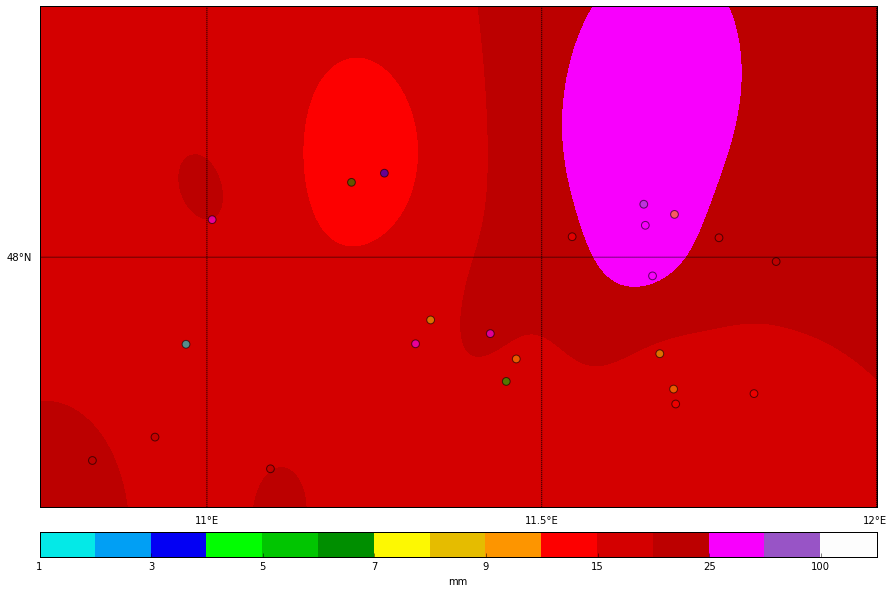

In [27]:
cmls.plot_idw(area,grid_res=250,acc_type="sum",power=2,smoothing=0.1)

## Create animated gif of precipitation rate (IDW Interpolation)

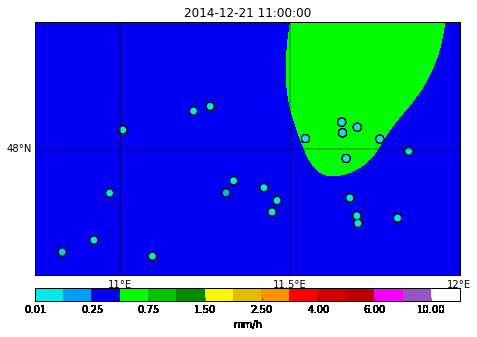

In [128]:
# May take some time depending on selected time span and time_resolution
cmls.plot_idw(area,grid_res=250,figsize=(10,5),acc_type="rr",time_resolution=60,power=2,smoothing=0.1)

### Show animated gif

In [1]:
from IPython.display import HTML
HTML('<iframe src=animation.gif width=750 height=400></iframe>')